# act_report

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

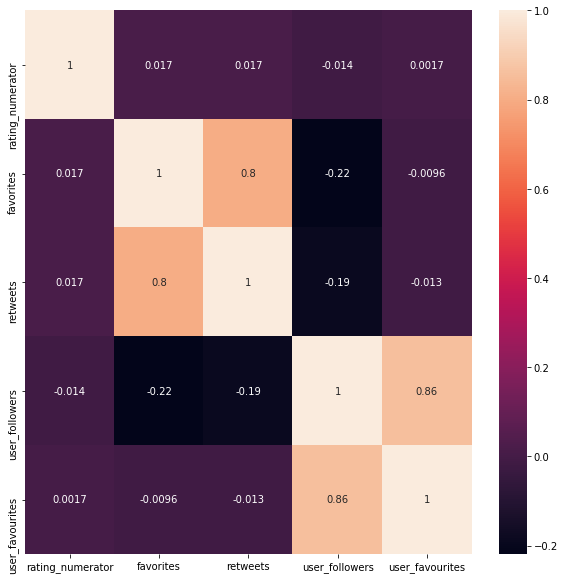

In [3]:
final_data = pd.read_csv('final_data')
corr_matrix = final_data[['rating_numerator','favorites','retweets','user_followers','user_favourites']].corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix,annot = True)

### Analysis

According to the heatmap,we can found that user_followers and user_favourites are closely correlated.The correlation coefficient between these two variables is 0.86.Therefore, we can graph a scatter plot and fit those scatter into a linear regression line to further view the relation between the two variables.

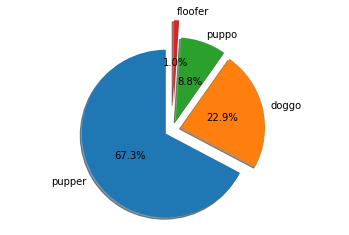

In [4]:
labels = final_data['dog_stage'].value_counts().index[:4]
data = final_data['dog_stage'].value_counts().values[:4]
explode = [0.1,0.1,0.1,0.3]

fig1,ax1 = plt.subplots()
ax1.pie(data,explode = explode,labels = labels,shadow = True,startangle = 90,autopct='%1.1f%%',pctdistance = 0.5)
ax1.axis('equal')
plt.show()

### Analysis

I plot a pie chart to visulize the proportion of different dog life stage.Pupper takes the lead in all the dog life stage types,accouting for approximately two thirds of the whole population,followed by doggo,which is 22.9%,is almost one third of the percentage of pupper.Puppo is considerably less common than doggo,which only constitutes 8.8% of the population. Floofer ranks the last,only taking up 1%.

Text(0.5, 1, 'The relation between favorites and retweets')

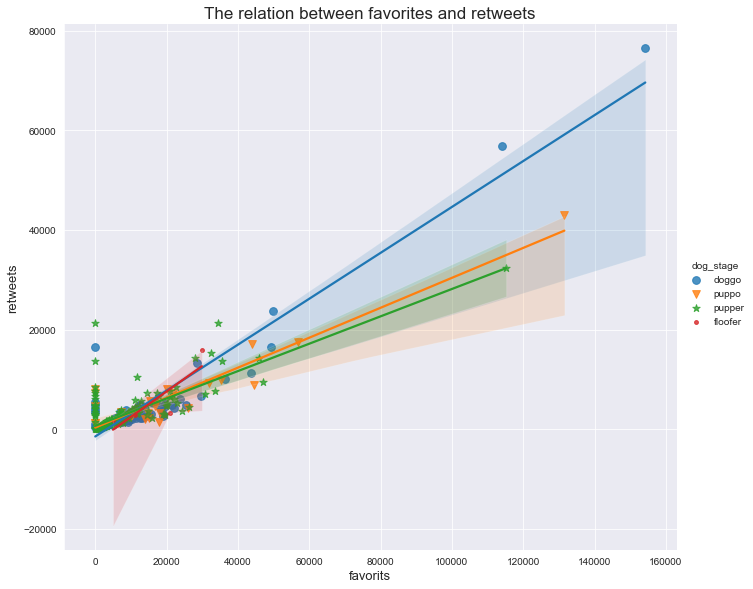

In [5]:
sns.set_style('darkgrid')
sns.lmplot(x = 'favorites', y = 'retweets',data = final_data,hue = 'dog_stage',scatter_kws={'s':60},markers=['o','v','*','.'],height = 8,aspect = 1.2,fit_reg = True)
plt.xlabel('favorits',fontsize = 13)
plt.ylabel('retweets',fontsize = 13)
plt.title('The relation between favorites and retweets',fontsize = 17)

### Analysis

In this chart,we can conclude that favorites counts and retweets counts are positively correlated. I set the hue = 'dog_stage' so that we can also take the dog_stage variable into consideration in this analysis.All the dog life stages have extreme high value with more than 40000 favourites with the exception of floofer.Doggo has the biggest values for both favourites and retweets.The regression slope for the doggo and floofer are almost the same from the 0 to 30000 favourits.The gradient for doggo is larger than that of pupper and puppo,which means that with one unit increase in the favourits will correlate with larger increase in the retweet in doggo than that of puppo and pupper.Last but not least,there are several observations with 0 favourit counts having more than 10000 retweets,among which one has even more than 20000 retweets.Those observations seem problematic and need further investigation.

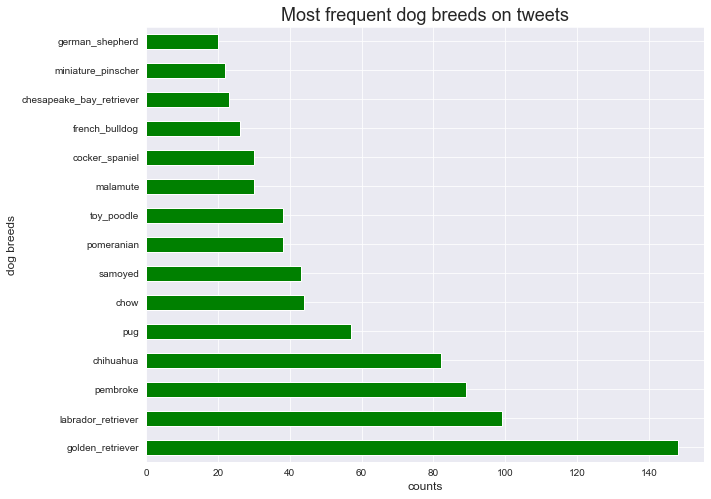

In [6]:
top15_breed = final_data[final_data['prediction_result_for_1'] == True]['most_confident_prediction'].value_counts(ascending = False)[:15]
plt.figure(figsize = (10,8))
plt.xlabel('counts',fontsize = 12)
plt.ylabel('dog breeds',fontsize = 12)
plt.title('Most frequent dog breeds on tweets',fontsize = 18)
top15_breed.plot(kind = 'barh',color = 'green')

### Analysis

I plot a bar chart for the most frequent dog breeds on these tweets.All the top 15 dog breeds have more 20 counts.The most frequent dog breed is golden retriever,which has more than 140 counts on tweets,followed by labrador retriever.

In [7]:
prediction_true = final_data[final_data['prediction_result_for_1'] == True]
high_rating = prediction_true['rating_numerator'].groupby(prediction_true['most_confident_prediction']).mean()
data = high_rating.sort_values(ascending = False)[:10]
data

most_confident_prediction
soft-coated_wheaten_terrier    26.700000
west_highland_white_terrier    15.642857
great_pyrenees                 14.928571
borzoi                         14.625000
labrador_retriever             13.797980
siberian_husky                 13.250000
saluki                         12.500000
tibetan_mastiff                12.400000
briard                         12.333333
golden_retriever               12.293919
Name: rating_numerator, dtype: float64

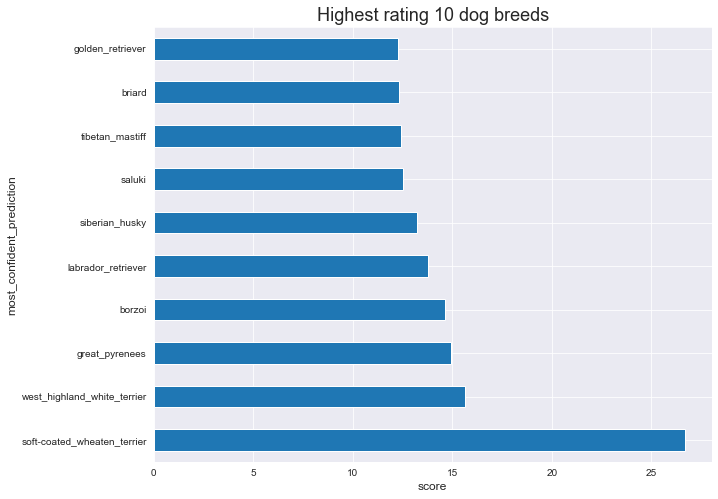

In [8]:
plt.figure(figsize = (10,8))
plt.xlabel('score',fontsize = 12)
plt.ylabel('dog breeds',fontsize = 12)
plt.title('Highest rating 10 dog breeds',fontsize = 18)
data.plot(kind = 'barh')

### Analysis

I also plot a bar chart for the top 10 dog breeds that have the highest ratings. All the 10 dog breeds have average rating scores that are higher than 12.The dog breed that has the highest rating score is soft coated wheaten terrier,whose rating is higher than 25.Yet the second-ranked dog breed is west highland white terrier that is only scored approximately 15.Let's take a look at the soft coated wheaten terrier.

In [10]:
final_data[final_data['most_confident_prediction'] == 'soft-coated_wheaten_terrier']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,prediction_coef_for_2,prediction_result_for_2,third_most_confident_prediction,prediction_coef_for_3,prediction_result_for_3,favorites,retweets,user_followers,user_favourites,date_time
1109,726887082820554753,2016-05-01 21:32:40+00:00,Twitter for iPhone,This is Blitz. He's a new dad struggling to co...,https://twitter.com/dog_rates/status/726887082...,10.0,10.0,Blitz,NaN,https://pbs.twimg.com/media/ChZr8SdWIAAVQKt.jpg,...,0.162655,True,chesapeake_bay_retriever,0.125182,True,3759.0,1489.0,8843548.0,145876.0,2016-05-01 21:32:40+00:00
1184,714251586676113411,2016-03-28 00:43:43+00:00,Twitter for iPhone,This is Thumas. He hates potted plants. 8/10 w...,https://twitter.com/dog_rates/status/714251586...,8.0,10.0,Thumas,NaN,https://pbs.twimg.com/media/CemIBt4WwAQqhVV.jpg,...,0.175652,True,great_pyrenees,0.011452,True,3206.0,818.0,8843549.0,145876.0,2016-03-28 00:43:43+00:00
1215,710658690886586372,2016-03-18 02:46:49+00:00,Twitter for iPhone,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80.0,80.0,NaN,pupper,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,...,0.018664,True,cairn,0.015943,True,2263.0,546.0,8843549.0,145876.0,2016-03-18 02:46:49+00:00
1441,692901601640583168,2016-01-29 02:46:29+00:00,Twitter for iPhone,"""Fuck the system"" 10/10 https://t.co/N0OADmCnVV",https://twitter.com/dog_rates/status/692901601...,10.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CZ2uU37UcAANzmK.jpg,...,0.135164,True,golden_retriever,0.088719,True,1729.0,592.0,8843550.0,145876.0,2016-01-29 02:46:29+00:00
1578,684222868335505415,2016-01-05 04:00:18+00:00,Twitter for iPhone,Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,121.0,110.0,NaN,pupper,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,...,0.072444,True,teddy,0.071486,False,3751.0,1336.0,8843569.0,145876.0,2016-01-05 04:00:18+00:00
1642,680940246314430465,2015-12-27 02:36:20+00:00,Twitter for iPhone,This is Alice. She's an idiot. 4/10 https://t....,https://twitter.com/dog_rates/status/680940246...,4.0,10.0,Alice,NaN,https://pbs.twimg.com/media/CXMvio7WQAAPZJj.jpg,...,0.157195,True,toy_poodle,0.074435,True,3149.0,1019.0,8843569.0,145876.0,2015-12-27 02:36:20+00:00
1878,673688752737402881,2015-12-07 02:21:29+00:00,Twitter for iPhone,Meet Larry. He doesn't know how to shoe. 9/10 ...,https://twitter.com/dog_rates/status/673688752...,9.0,10.0,Larry,NaN,https://pbs.twimg.com/media/CVlsVs3WIAAja6m.jpg,...,0.234898,True,kuvasz,0.203495,True,1205.0,466.0,8843570.0,145876.0,2015-12-07 02:21:29+00:00
2149,668274247790391296,2015-11-22 03:46:11+00:00,Twitter for iPhone,Meet Sophie. Her son just got in the car to le...,https://twitter.com/dog_rates/status/668274247...,10.0,10.0,Sophie,NaN,https://pbs.twimg.com/media/CUYv4d2WUAAziXs.jpg,...,0.263854,True,toy_poodle,0.150844,True,774.0,220.0,8843614.0,145876.0,2015-11-22 03:46:11+00:00
2211,667176164155375616,2015-11-19 03:02:47+00:00,Twitter for iPhone,These are strange dogs. All have toupees. Long...,https://twitter.com/dog_rates/status/667176164...,4.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CUJJLtWWsAE-go5.jpg,...,0.215218,True,toy_poodle,0.106014,True,575.0,425.0,8843614.0,145876.0,2015-11-19 03:02:47+00:00
2251,666373753744588802,2015-11-16 21:54:18+00:00,Twitter for iPhone,Those are sunglasses and a jean jacket. 11/10 ...,https://twitter.com/dog_rates/status/666373753...,11.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg,...,0.259551,True,briard,0.206803,True,171.0,80.0,8843615.0,145876.0,2015-11-16 21:54:18+00:00


### Analysis

There are only 10 entries for the soft-coated_wheaten_terrier dog breed.The results are suject to be affeacted by extreme values if the dataset is small.There are two extremely large values which are 80 and 121 respectively.That might be the reason why soft-coated_wheaten_terrier ranks the first in the rating.

## End